In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

## Design of quantum circuits
Design quantum circuit for the operations HSHT and check the output for the two basic input qubits. 
Check the reversibility of the operation HSHT and comments on that.
Design a quantum circuit using H and Control- Not gate and check the output for various input combinations. 
Comments on the output generated by the above circuit and establish the relation with Bell states

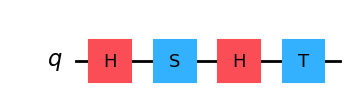

In [2]:
# Create a quantum circuit with 2 qubits and 2 classical bits
circuit = QuantumCircuit(1)
circuit.h(0)  # Apply Hadamard gate to the first qubit
circuit.s(0)  # Apply S gate to the first qubit
circuit.h(0)  # Apply Hadamard gate to the first qubit again
circuit.t(0)  # Apply T gate to the first qubit

display(circuit.draw(output='mpl'))

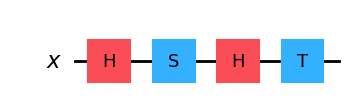

In [3]:
x = QuantumRegister(1, 'x')
circuit = QuantumCircuit(x)
circuit.h(x)  # Apply Hadamard gate to the first qubit
circuit.s(x)
circuit.h(x)
circuit.t(x)

display(circuit.draw(output='mpl'))

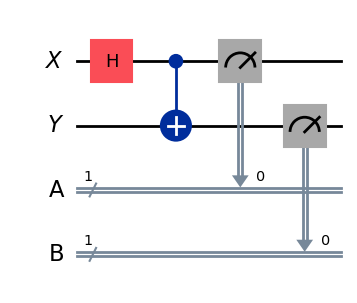

In [6]:
X = QuantumRegister(1, 'X')
Y = QuantumRegister(1, 'Y')
A = ClassicalRegister(1, 'A')
B = ClassicalRegister(1, 'B')

circuit = QuantumCircuit(X, Y, A, B)
circuit.h(X)
circuit.cx(X, Y)
circuit.measure(X, A)
circuit.measure(Y, B)

display(circuit.draw(output='mpl'))

/tmp/ipykernel_143556/1649172961.py:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  resutls = Sampler().run(circuit).result()


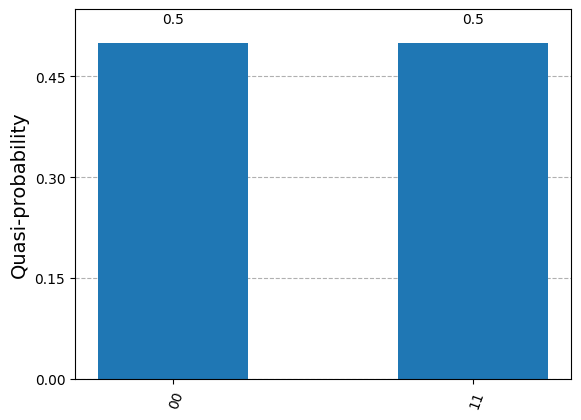

In [7]:
resutls = Sampler().run(circuit).result()
statistics = resutls.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

In [4]:
!pip install qiskit qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 2.7 MB/s  0:00:042.6 MB/s eta 0:00:01:01


In [5]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.quantum_info import Statevector, Operator
import numpy as np


In [6]:
# -------------------------
# 1. Single Qubit: HSHT
# -------------------------
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.s(0)
qc1.h(0)
qc1.t(0)

print("\nQuantum Circuit for HSHT:")
print(qc1.draw())


Quantum Circuit for HSHT:
   ┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘


In [7]:

# Get the operator matrix
U = Operator(qc1)
print("\nMatrix representation of HSHT:\n", np.round(U.data, 3))

# Apply on |0> and |1>
sv0 = Statevector.from_label('0')
sv1 = Statevector.from_label('1')

out0 = sv0.evolve(qc1)
out1 = sv1.evolve(qc1)

print("\nOutput for |0>:\n", out0)
print("Output for |1>:\n", out1)


Matrix representation of HSHT:
 [[0.5  +0.5j   0.5  -0.5j  ]
 [0.707+0.j    0.   +0.707j]]

Output for |0>:
 Statevector([0.5       +0.5j, 0.70710678+0.j ],
            dims=(2,))
Output for |1>:
 Statevector([0.5-0.5j       , 0. +0.70710678j],
            dims=(2,))


In [8]:
# Check unitarity (reversibility)
U_dagger = U.adjoint()
check = np.allclose(U_dagger.data @ U.data, np.eye(2))
print("\nIs HSHT reversible (unitary)? ->", check)


Is HSHT reversible (unitary)? -> True


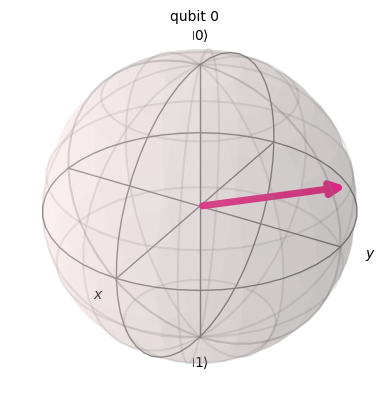

In [9]:
# Optional: visualize Bloch spheres
plot_bloch_multivector(out0)
plot_bloch_multivector(out1)

In [11]:
# -------------------------
# 2. Two-Qubit: H + CNOT
# -------------------------
qc2 = QuantumCircuit(2)
qc2.h(0)
qc2.cx(0,1)

print("\nQuantum Circuit for (H + CNOT):")
print(qc2.draw())

# Test for all computational basis inputs
inputs = ['00','01','10','11']
for inp in inputs:
    sv_in = Statevector.from_label(inp)
    sv_out = sv_in.evolve(qc2)
    print(f"\nInput |{inp}> -> Output State:\n", sv_out)
    plot_bloch_multivector(sv_out)




Quantum Circuit for (H + CNOT):
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

Input |00> -> Output State:
 Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))

Input |01> -> Output State:
 Statevector([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))

Input |10> -> Output State:
 Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))

Input |11> -> Output State:
 Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


In [12]:
# Bell state expectations:
bell_states = {
    "|00>": "(|00> + |11>)/√2 = |Φ⁺>",
    "|01>": "(|01> + |10>)/√2 = |Ψ⁺>",
    "|10>": "(|00> - |11>)/√2 = |Φ⁻>",
    "|11>": "(|01> - |10>)/√2 = |Ψ⁻>"
}

print("\nExpected mapping to Bell States:")
for k, v in bell_states.items():
    print(f"{k} → {v}")



Expected mapping to Bell States:
|00> → (|00> + |11>)/√2 = |Φ⁺>
|01> → (|01> + |10>)/√2 = |Ψ⁺>
|10> → (|00> - |11>)/√2 = |Φ⁻>
|11> → (|01> - |10>)/√2 = |Ψ⁻>


These are **the four Bell states** — the circuit acts as a *Bell-state generator*.